In [1]:
import numpy
import random
import itertools
import pickle
import matplotlib.pyplot as plt

In [2]:
#### parameters
version = 2
trial = 1
num_categories = 388
num_categories_transformed = [97, 194, 291]
random.seed(trial) # seed fixed
category_orders = [i for i in range(num_categories)]
random.shuffle(category_orders)

/var/folders/_1/4xb13lhx0nx3zt45yhd8qf740000gn/T/ipykernel_3969/3110543746.py:22: RuntimeWarning: invalid value encountered in true_divide
  accuracies = num_corrects / num_images
/var/folders/_1/4xb13lhx0nx3zt45yhd8qf740000gn/T/ipykernel_3969/3110543746.py:100: RuntimeWarning: invalid value encountered in true_divide
  accuracies2 = num_corrects / num_images


(0.0, 1.0)

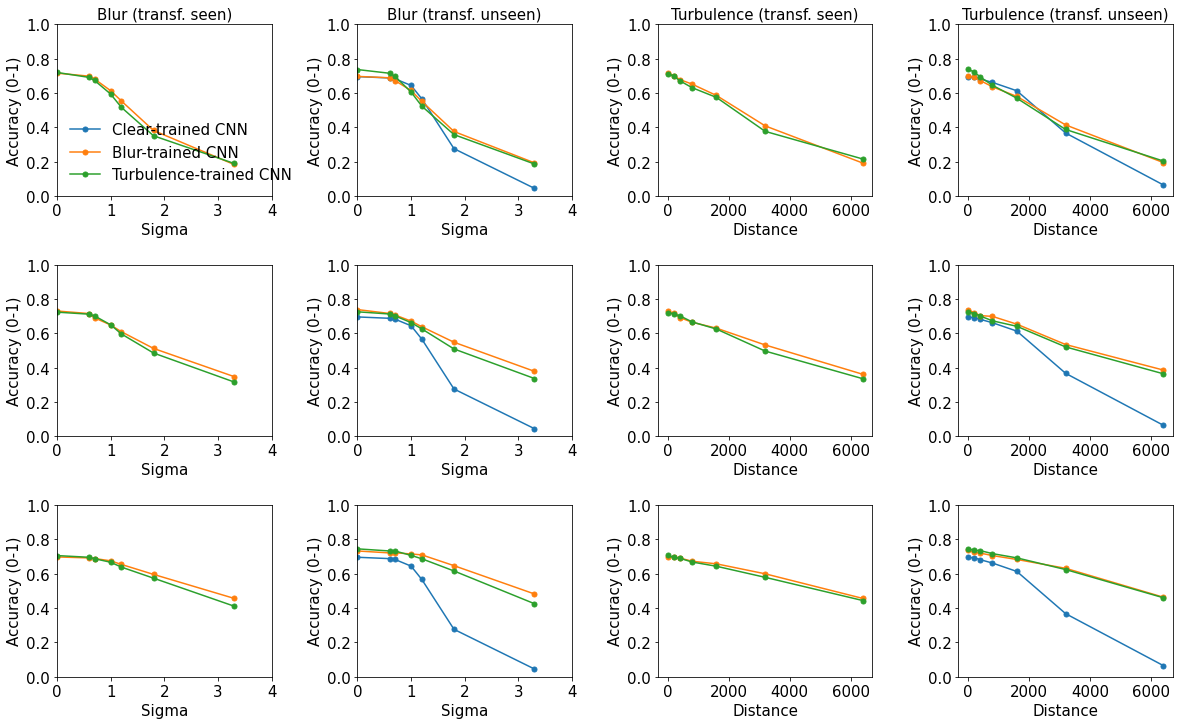

In [6]:
plt.figure(figsize=(20,12))
plt.rcParams['font.size'] = '15'

#### accuracy by blur
ids = [0, 1, 2, 3, 4, 5, 6] # clear, blur, turbulence
model_names = ['Clear-trained CNN', 'Blur-trained CNN', 'Turbulence-trained CNN']
params = [0, 0.6, 0.7, 1, 1.2, 1.8, 3.3] # blur

num_corrects = numpy.zeros((len(ids), 2, len(params)))
num_images = numpy.zeros((len(ids), 2, len(params)))

for i, id in enumerate(ids):
    with open('/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/v{}/id{}_t{}/analysis_v2_accuracy_within_across_category_by_blur.pickle'.format(version, id, trial), 'rb') as f:
        data = pickle.load(f)

    for j, pth in enumerate(data['path']):
        l = 0 if data['is_transformed'][j] == True else 1
        kk = [k for k, p in enumerate(params) if '_' + str(p) + '.jpg' in pth][0]
        num_corrects[i, l, kk] = num_corrects[i, l, kk] + 1 if data['correct1'][j] == True else num_corrects[i, l, kk]
        num_images[i, l, kk] = num_images[i, l, kk] + 1

accuracies = num_corrects / num_images

#### visualize
plt.subplot(3,4, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies[[0,1,2],0,:].transpose(), '.-', markersize=10)
plt.xlabel('Sigma')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,4])
plt.ylim(0,1)
plt.title('Blur (transf. seen)', fontdict = {'fontsize':15})
plt.legend(model_names, frameon=False)

plt.subplot(3,4, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies[[0,1,2],1,:].transpose(), '.-', markersize=10)
plt.xlabel('Sigma')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,4])
plt.ylim(0,1)
plt.title('Blur (transf. unseen)', fontdict = {'fontsize':15})

plt.subplot(3,4, 5)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies[[0,3,4],0,:].transpose(), '.-', markersize=10)
plt.xlabel('Sigma')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Blur (within-category)', fontdict = {'fontsize':15})
# plt.legend(model_names, frameon=False)

plt.subplot(3,4, 6)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies[[0,3,4],1,:].transpose(), '.-', markersize=10)
plt.xlabel('Sigma')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Blur (across-category)', fontdict = {'fontsize':15})

plt.subplot(3,4, 9)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies[[0,5,6],0,:].transpose(), '.-', markersize=10)
plt.xlabel('Sigma')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Blur (within-category)', fontdict = {'fontsize':15})
# plt.legend(model_names, frameon=False)

plt.subplot(3,4, 10)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies[[0,5,6],1,:].transpose(), '.-', markersize=10)
plt.xlabel('Sigma')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Blur (across-category)', fontdict = {'fontsize':15})

#### accuracy by turbulence
ids = [0, 1, 2, 3, 4, 5, 6] # clear, blur, turbulence
model_names = ['Clear-trained CNN', 'Blur-trained CNN', 'Turbulence-trained CNN']
params = [0, 200, 400, 800, 1600, 3200, 6400] # turbulence

num_corrects = numpy.zeros((len(ids), 2, len(params)))
num_images = numpy.zeros((len(ids), 2, len(params)))

for i, id in enumerate(ids):
    with open('/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/v{}/id{}_t{}/analysis_v2_accuracy_within_across_category_by_turbulence.pickle'.format(version, id, trial), 'rb') as f:
        data = pickle.load(f)

    for j, pth in enumerate(data['path']):
        l = 0 if data['is_transformed'][j] == True else 1
        kk = [k for k, p in enumerate(params) if '_' + str(p) + '.jpg' in pth][0]
        num_corrects[i, l, kk] = num_corrects[i, l, kk] + 1 if data['correct1'][j] == True else num_corrects[i, l, kk]
        num_images[i, l, kk] = num_images[i, l, kk] + 1

accuracies2 = num_corrects / num_images

#### visualize
plt.subplot(3,4, 3)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies2[[0,1,2],0,:].transpose(), '.-', markersize=10)
plt.xlabel('Distance')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0,4])
plt.ylim(0,1)
plt.title('Turbulence (transf. seen)', fontdict = {'fontsize':15})
# plt.legend(model_names, frameon=False)

plt.subplot(3,4, 4)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies2[[0,1,2],1,:].transpose(), '.-', markersize=10)
plt.xlabel('Distance')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0,4])
plt.ylim(0,1)
plt.title('Turbulence (transf. unseen)', fontdict = {'fontsize':15})

plt.subplot(3,4, 7)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies2[[0,3,4],0,:].transpose(), '.-', markersize=10)
plt.xlabel('Distance')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Turbulence (within-category)', fontdict = {'fontsize':15})
# plt.legend(model_names, frameon=False)

plt.subplot(3,4, 8)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies2[[0,3,4],1,:].transpose(), '.-', markersize=10)
plt.xlabel('Distance')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Turbulence (across-category)', fontdict = {'fontsize':15})

plt.subplot(3,4, 11)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies2[[0,5,6],0,:].transpose(), '.-', markersize=10)
plt.xlabel('Distance')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Turbulence (within-category)', fontdict = {'fontsize':15})
# plt.legend(model_names, frameon=False)

plt.subplot(3,4, 12)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(params, accuracies2[[0,5,6],1,:].transpose(), '.-', markersize=10)
plt.xlabel('Distance')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0,4])
plt.ylim(0,1)
# plt.title('Turbulence (across-category)', fontdict = {'fontsize':15})